In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys,os
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase
from mpl_toolkits.axes_grid1 import inset_locator
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import pearsonr, kruskal
dred='#C72228'
dorange='#F98F34'
dblue='#0C4E9B'
dgreen='#6BBC46'
lred='#F5867F'
lorange='#FFBC80'
lblue='#6B98C4'
lgreen='#B4DEA2'

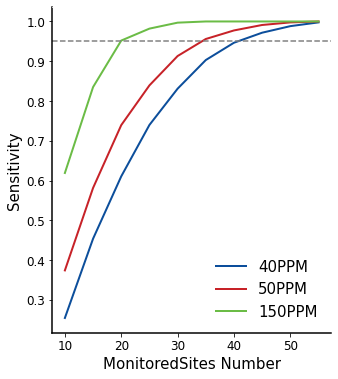

In [10]:
#Figure 1b 
data = pd.read_table(r".\data\Hi-SECURE_construction\HD827_sensitivity.xls",sep="\t")
data=data[data['DNAinput']==20]
data1 = data[data.PPM==10]
data2 = data[data.PPM==20]
data3 = data[data.PPM==30]
data4 = data[data.PPM==40]
data5 = data[data.PPM==50]
data7 = data[data.PPM==150]
data8 = data[data.PPM==750]
plt.figure(figsize=(5,6))
plt.xticks([10,20,30,40,50],[10,20,30,40,50],fontsize=12)
plt.yticks([0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],[0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],fontsize=12)
plt.xlabel('MonitoredSites Number',fontsize=15)
plt.ylabel('Sensitivity',fontsize=15)
plt.plot(data4['MonitoredMutations(#)'],data4['Sensitivity/Specificity'],label='40PPM',color=dblue,linewidth=2)
plt.plot(data5['MonitoredMutations(#)'],data5['Sensitivity/Specificity'],label='50PPM',color=dred,linewidth=2)
plt.plot(data7['MonitoredMutations(#)'],data7['Sensitivity/Specificity'],label='150PPM',color=dgreen,linewidth=2)
plt.axhline(0.95, color='grey', linestyle='--')
legend = plt.legend(fontsize=15,loc='lower right',frameon=False)
legend.get_title().set_fontsize(15)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
# plt.savefig(r'HD827_lod_20ng_cutnumber_1.pdf',dpi=500,bbox_inches='tight')

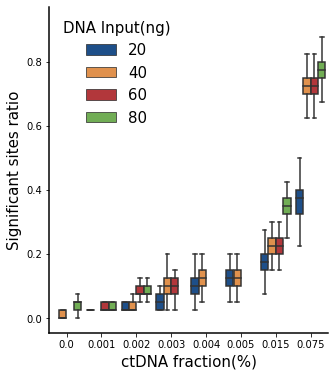

In [11]:
#Figure 1c
hd827_stats = pd.read_csv(r".\data\Hi-SECURE_construction\HD827_stats.xls", sep="\t")
hd827_stats = hd827_stats[hd827_stats["DNAinput"].isin([20, 40, 60, 80])]
hd827_stats["PPM"] = hd827_stats["PPM"].apply(lambda x: 50 if x == 60 else x)
hd827_stats_plot = hd827_stats.iloc[:, :1009]
hd827 = hd827_stats_plot.iloc[:, :9]
res_l = []
for i in range(1, 991, 1):
    cur = hd827.copy()
    cur[f"Mock"] = hd827_stats_plot.loc[:, f"Mock{i}"]
    cur[f"Mock_time"] = i
    res_l.append(cur)
res = pd.concat(res_l)
res["sig_ratio"] = res["Mock"] / res["MonitoredMutations"]
fig, ax = plt.subplots(figsize=(5, 6))
plotdf = res[res["MonitoredMutations"].isin([40])].sort_values(
    by=["sig_ratio"], ascending=True
)
plotdf["rank"] = plotdf.groupby(["DNAinput", "PPM", "LibraryID"])[
    "sig_ratio"
].rank(ascending=False, method="first")
# plotdf=plotdf[plotdf['rank']<1000]
plotdf = plotdf[plotdf["PPM"].isin([0, 10, 20, 30, 40, 50, 150, 750])]
NA12878 = plotdf[plotdf["SampleID"] == "NA12878"]
else_sample = plotdf[plotdf["SampleID"] != "NA12878"]
else_sample = else_sample[else_sample["sig_ratio"] > 0]
plotdf = pd.concat([NA12878, else_sample])
plotdf["ctDNA fraction"] = plotdf["PPM"] / 10000
sns.boxplot(
    data=plotdf,
    x="ctDNA fraction",
    y="sig_ratio",
    hue="DNAinput",
    palette=[dblue, dorange, dred, dgreen],
    width=0.85,
    fliersize=0,
)
plt.xlabel("ctDNA fraction(%)", fontsize=15)
plt.ylabel("Significant sites ratio", fontsize=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)

legend = ax.legend(loc="upper left", fontsize=15)
legend.set_title("DNA Input(ng)")
legend.set_frame_on(False)
legend.get_title().set_fontsize(15)

plt.title("")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax = plt.gca()
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
# plt.savefig(r'input_Significant_site_ratio_only_hd827.pdf',dpi=500,bbox_inches='tight')

c:\Users\Simceredx\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


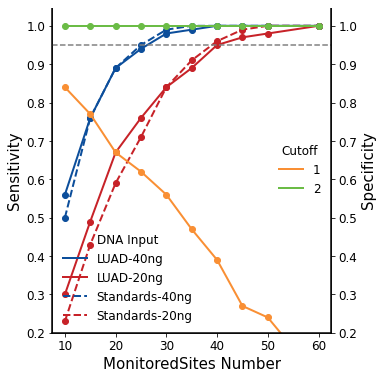

In [29]:
# Figure 1d
fig, ax1 = plt.subplots(figsize=(5, 6))

data_specificity = pd.read_excel(r".\data\Hi-SECURE_construction\Specificity.xlsx")
data_sensitivity = pd.read_excel(r".\data\Hi-SECURE_construction\LUAD_sensitivity.xlsx")
data = pd.read_table(r".\data\Hi-SECURE_construction\Seracare_sensitivity.xls", sep="\t")
dataP1=data_specificity[data_specificity['Cutoff mutations(#)']==1]
dataP2=data_specificity[data_specificity['Cutoff mutations(#)']==2]
dataS1 = data_sensitivity[data_sensitivity['cutoff']==1]
dataS2 = data_sensitivity[data_sensitivity['cutoff']==2]
dataS2["Sensitivity/Specificity"] = dataS2["Sensitivity/Specificity"].apply(
    lambda x: round(x, 2)
)
dataS2_ = dataS2[dataS2.DilutionRatio == 10000]
dataP1["Specificity"] = dataP1["Specificity"].apply(
    lambda x: round(x, 2)
)
dataP2["Specificityy"] = dataP2["Specificity"].apply(
    lambda x: round(x, 2)
)
dataS22 = data[data["PPM"] == 50]
dataS22["Sensitivity/Specificity"] = dataS22["Sensitivity/Specificity"].apply(
    lambda x: round(x, 2)
)

ng40 = dataS2_[dataS2_["DNAinput"] == 40]
ng20 = dataS2_[dataS2_["DNAinput"] == 20]


ng40_seracare = dataS22[dataS22["DNAinput"] == 40]
ng20_seracare = dataS22[dataS22["DNAinput"] == 20]


ax1.set_xticks([10, 20, 30, 40, 50, 60], [10, 20, 30, 40, 50, 60], fontsize=12)
ax1.set_yticks(
    [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    fontsize=12,
)
ax1.set_xlabel("MonitoredSites Number", fontsize=15)
ax1.set_ylabel("Sensitivity", fontsize=15)
ax1.plot(
    ng40["MonitoredMutations(#)"],
    ng40["Sensitivity/Specificity"],
    label="LUAD-40ng",
    color=dblue,
    linewidth=2,
)
ax1.plot(
    ng20["MonitoredMutations(#)"],
    ng20["Sensitivity/Specificity"],
    label="LUAD-20ng",
    color=dred,
    linewidth=2,
)
ax1.scatter(
    ng40["MonitoredMutations(#)"],
    ng40["Sensitivity/Specificity"],
    color=dblue,
    linewidth=1,
)
ax1.scatter(
    ng20["MonitoredMutations(#)"],
    ng20["Sensitivity/Specificity"],
    color=dred,
    linewidth=1,
)
ax1.plot(
    ng40_seracare["MonitoredMutations(#)"],
    ng40_seracare["Sensitivity/Specificity"],
    label="Standards-40ng",
    linestyle="--",
    color=dblue,
    linewidth=2,
)
ax1.plot(
    ng20_seracare["MonitoredMutations(#)"],
    ng20_seracare["Sensitivity/Specificity"],
    label="Standards-20ng",
    linestyle="--",
    color=dred,
    linewidth=2,
)
ax1.scatter(
    ng40_seracare["MonitoredMutations(#)"],
    ng40_seracare["Sensitivity/Specificity"],
    color=dblue,
    linewidth=1,
)
ax1.scatter(
    ng20_seracare["MonitoredMutations(#)"],
    ng20_seracare["Sensitivity/Specificity"],
    color=dred,
    linewidth=1,
)


ax2 = ax1.twinx()
ax2.set_yticks(
    [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    fontsize=12,
)
ax2.set_ylabel("Specificity", fontsize=15)
ax2.plot(
    dataP1["Monitoring mutations(#)"],
    dataP1["Specificity"],
    color=dorange,
    label="1",
    linewidth=2,
)
ax2.plot(
    dataP2["Monitoring mutations(#)"],
    dataP2["Specificity"],
    color=dgreen,
    label="2",
    linewidth=2,
)
ax2.scatter(
    dataP1["Monitoring mutations(#)"],
    dataP1["Specificity"],
    color=dorange,
    linewidth=1,
)
ax2.scatter(
    dataP2["Monitoring mutations(#)"],
    dataP2["Specificity"],
    color=dgreen,
    linewidth=1,
)
ax2.axhline(0.95, color="grey", linestyle="--")

legend1 = ax1.legend(fontsize=12, loc="lower left", frameon=False, title="DNA Input")
legend1.get_title().set_fontsize(12)
legend2 = ax2.legend(fontsize=12, loc="center right", frameon=False, title="Cutoff")
legend2.get_title().set_fontsize(12)
ax1.set_ylim(0.2, 1.05)
ax2.set_ylim(0.2, 1.05)

ax = plt.gca()
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["top"].set_color("white")
# plt.savefig(r'sensitivity_specificity.pdf',dpi=500,bbox_inches='tight')

0 0
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 0
0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
0 2
1 2
2 2
3 2
4 2
5 2
6 2
7 2
8 2
0 3
1 3
2 3
3 3
4 3
5 3
6 3
7 3
8 3
0 4
1 4
2 4
3 4
4 4
5 4
6 4
7 4
8 4
0 5
1 5
2 5
3 5
4 5
5 5
6 5
7 5
8 5
0 6
1 6
2 6
3 6
4 6
5 6
6 6
7 6
8 6
0 7
1 7
2 7
3 7
4 7
5 7
6 7
7 7
8 7


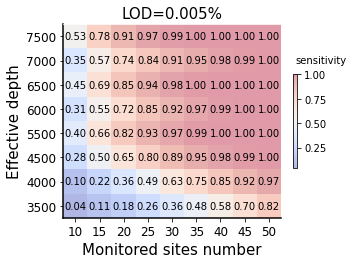

In [30]:
# Figure 1f
df = pd.read_csv(r".\data\Hi-SECURE_construction\HD827_downsample.xls", sep="\t")
ppm = 50
plot_df = (
    df[(df["PPM"] == ppm) & (df["use_for_range"] > 3000) & (df["use_for_range"] < 7600)]
    .pivot_table(
        values="Sensitivity/Specificity", columns="use_for_range", index="selectnum"
    )
    .T.sort_index(ascending=False)
)
x_values = np.array(plot_df.columns)
y_values = np.array(plot_df.index)
x_num = len(x_values)
y_num = len(y_values)

plt.figure(figsize=(5, 6))

heatmap = plt.imshow(plot_df, cmap="coolwarm", interpolation="nearest", alpha=0.4)
plt.xticks(ticks=np.arange(0, x_num, 1), labels=x_values, color="black", fontsize=12)
plt.yticks(ticks=np.arange(0, y_num, 1), labels=y_values, color="black", fontsize=12)
plt.xlabel("Monitored sites number", fontsize=15)
plt.ylabel("Effective depth", fontsize=15)

cbar = plt.colorbar(fraction=0.02)
plt.title(f"LOD={ppm/10000}%", fontsize=15)

ax = plt.gca()
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
plt.grid(False)
cbar.ax.text(0.5, 1.2, "sensitivity", va="top", ha="left", transform=cbar.ax.transAxes)
# plt.text(0,0,'a')
for i in range(len(y_values)):
    for j in range(len(x_values)):
        print(j, i)
        plt.text(
            j,
            i,
            f"{plot_df.iloc[i, j]:.2f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
        )
plt.tight_layout()
# plt.savefig(r'.\figure\HD827_sitenunm_depth_50PPM.pdf',dpi=500,bbox_inches='tight')

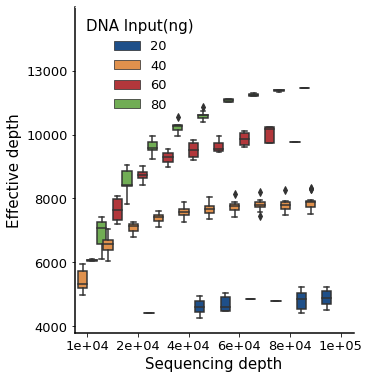

In [47]:
# Figure 1g
plot_df=pd.read_excel(r'.\data\Hi-SECURE_construction\HD827_downsample_depth.xlsx')

fig, ax = plt.subplots(figsize=(5, 6))

sns.boxplot(
    data=plot_df,
    x="targetdepth_scinotation",
    y="median_umi_depth",
    hue="DNAinput",
    palette=[dblue, dorange, dred, dgreen],
    width=1.5,
)
plt.xlabel("Sequencing depth", fontsize=15)
plt.ylabel("Effective depth", fontsize=15)
plt.xticks(
    [0, 2, 4, 6, 8, 10],
    ["1e+04", "2e+04", "4e+04", "6e+04", "8e+04", "1e+05"],
    fontsize=13,
)

plt.yticks(
    [4000, 6000, 8000, 10000, 12000], [4000, 6000, 8000, 10000, 13000], fontsize=13
)
plt.ylim(3800, 14000)

legend = ax.legend(loc="upper left", fontsize=13)
legend.set_title("DNA Input(ng)")
legend.set_frame_on(False)
legend.get_title().set_fontsize(15)
ax = plt.gca()
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("white")

ax.spines["top"].set_color("white")
plt.grid(False)

# plt.savefig(
#     r".\figure\targedepth_effectivedepth_input.pdf",
#     dpi=500,
#     bbox_inches="tight",
# )

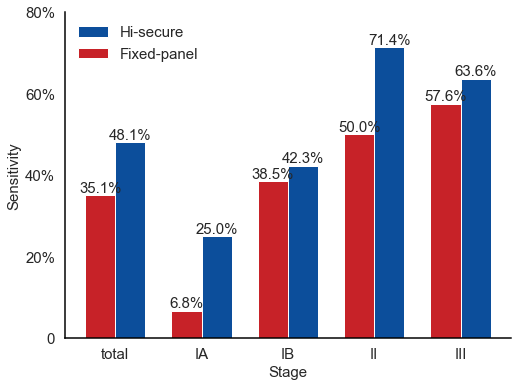

In [48]:
# Figure 3a
data = {
    "Stage": ["total", "IA", "IB", "II", "III"],
    "Hi-SECURE": [0.4809, 0.25, 0.423076, 0.7142857, 0.6363],
    "Population": [0.35114, 0.068181, 0.3846, 0.5, 0.5757],
}
df = pd.DataFrame(data)

sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(8, 6))

bar_width = 0.35
index = range(len(df["Stage"]))

bar1 = ax.bar(
    [i + bar_width / 2 for i in index],
    df["Hi-SECURE"],
    bar_width,
    label="Hi-secure",
    color=dblue,
)

bar2 = ax.bar(
    [i - bar_width / 2 for i in index],
    df["Population"],
    bar_width,
    label="Fixed-panel",
    color=dred,
)

ax.set_xlabel("Stage", fontsize=15)
ax.set_ylabel("Sensitivity", fontsize=15)
ax.set_xticks(index, fontsize=15)
ax.set_xticklabels(df["Stage"], fontsize=15)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8], fontsize=15)
ax.set_yticklabels(["0", "20%", "40%", "60%", "80%"], fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.legend(frameon=False, fontsize=15)
plt.grid(False)

for rect in bar1:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=15,
    )

for rect in bar2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
        fontsize=15,
    )

plt.savefig(r".\figure\Pre_sensitivity_byStage.pdf", dpi=500, bbox_inches="tight")

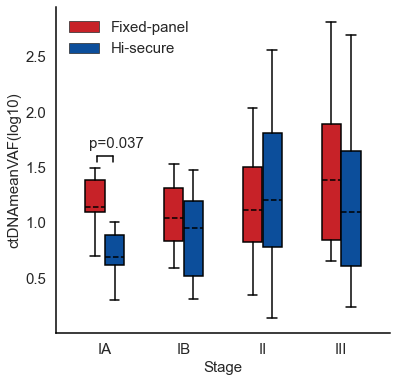

In [60]:
# Figure 3b
pcm = pd.read_excel(r".\data\POEM\Hi-SECURE_Patient_level.xlsx")
fix = pd.read_excel(r".\data\POEM\FixPanel_patient_level.xlsx")
info = pd.read_excel(r".\data\POEM\Clinical.xlsx").loc[:, ["PatientID", "Stage_actual"]]
pre_pcm = pd.merge(pcm, info, on="PatientID")
pre_fix = pd.merge(fix, info, on="PatientID")
pre_pcm = pre_pcm[
    (pre_pcm["Operation"] == "Pre") & (pre_pcm["Hi-SECURE_Detected"] == "Yes")
]
pre_fix = pre_fix[
    (pre_fix["Operation"] == "Pre") & (pre_fix["FixPanel_Detected"] == "Yes")
]
pre_pcm = pre_pcm.rename(
    columns={
        "Hi-SECURE_Detected": "Detected",
        "Hi-SECURE_ctDNAmeanVAF(%)": "ctDNAmeanVAF(%)",
    }
)
pre_pcm["method"] = "Hi-secure"
pre_fix = pre_fix.rename(
    columns={
        "FixPanel_Detected": "Detected",
        "FixPanel_ctDNAmeanVAF(%)": "ctDNAmeanVAF(%)",
    }
)
pre_fix["method"] = "Fixed-panel"
pre = pd.concat([pre_pcm, pre_fix])


pre = pre.sort_values(by="method")
pre["log10ctDNAmeanVAF"] = pre["ctDNAmeanVAF(%)"].apply(lambda x: np.log10(x * 100))

fontsize = 15

order = ["IA", "IB", "II", "III"]
palette = {"Fixed-panel": dred, "Hi-secure": dblue}
plt.figure(figsize=(6, 6))


ax = sns.boxplot(
    x="Stage_actual",
    y="log10ctDNAmeanVAF",
    data=pre,
    showfliers=False,
    hue="method",
    palette=palette,
    order=order,
    width=0.5,
    saturation=1,
    boxprops={"edgecolor": "black"},
    medianprops={"linestyle": "--", "color": "black"},
    whiskerprops={"color": "black"},
    capprops={"color": "black"},
)

plt.xlabel("Stage", fontsize=fontsize)
plt.ylabel("ctDNAmeanVAF(log10)", fontsize=fontsize)
plt.legend(frameon=False, fontsize=15)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
sns.despine()
ax = plt.gca()
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)

ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")

plt.grid(False)
stat1a, p_value1a = mannwhitneyu(
    pre[(pre["method"] == "Fixed-panel") & (pre["Stage_actual"] == "IA")][
        "log10ctDNAmeanVAF"
    ],
    pre[(pre["method"] != "Fixed-panel") & (pre["Stage_actual"] == "IA")][
        "log10ctDNAmeanVAF"
    ],
)

plt.text(-0.2, 1.65, f"p={p_value1a:.3f}", va="bottom", fontsize=fontsize)
plt.plot([-0.1, -0.1], [1.55, 1.6], color="black")
plt.plot([0.1, 0.1], [1.55, 1.6], color="black")
plt.plot([-0.1, 0.1], [1.6, 1.6], color="black")

# plt.savefig(r'D:\5.日常工作和项目\1.project\10.MRD\3.临床\1.省人民MRD\结项分析\202405\2.scripts_plot\Hi-secure术前检测性能\Pre_ctDNALevel_byStage_p.pdf',bbox_inches='tight',dpi=500)

both:42,pcm_only:21,fix_only:4


c:\Users\Simceredx\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


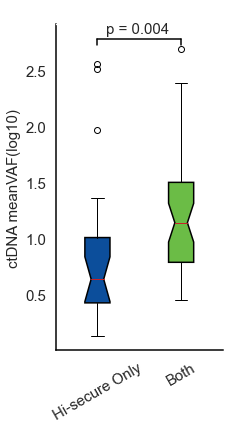

In [65]:
#Figure 3c
pcm=pcm[(pcm['PCM_Detected']=='Yes')&(pcm['Operation']=='Pre')]
fix=fix[(fix['Population_Detected']=='Yes')&(fix['Operation']=='Pre')]

both=pd.merge(pcm,fix,on='SampleName')
only=pd.concat([pcm,fix]).drop_duplicates(subset='SampleName',keep=False)
pcm_only=only[only['SampleName'].isin(pcm['SampleName'])]
fix_only=only[only['SampleName'].isin(fix['SampleName'])]

print(f'both:{both.shape[0]},pcm_only:{pcm_only.shape[0]},fix_only:{fix_only.shape[0]}')
pcm_only['PCM_ctDNAmeanVAF(log10)']=pcm_only['PCM_ctDNAmeanVAF(%)'].apply(lambda x:np.log10(x*100))
both['PCM_ctDNAmeanVAF(log10)']=both['PCM_ctDNAmeanVAF(%)'].apply(lambda x:np.log10(x*100))

sns.set(style="whitegrid")

plt.figure(figsize=(3, 6))
box = plt.boxplot([pcm_only['PCM_ctDNAmeanVAF(log10)'], both['PCM_ctDNAmeanVAF(log10)']],
                  patch_artist=True, notch=True, boxprops=dict(linewidth=1.5),widths=0.3,medianprops = {'color':dred},)

colors = [dblue, dgreen]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.xticks([1, 2], ['Hi-secure Only',  'Both'],rotation=30,fontsize=15)
plt.yticks([0,0.5,1,1.5,2,2.5],fontsize=15) 
plt.ylabel('ctDNA meanVAF(log10)',fontsize=15)

ax = plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
    
stat, p_value = mannwhitneyu(pcm_only['PCM_ctDNAmeanVAF(log10)'], both['PCM_ctDNAmeanVAF(log10)'])

ax.tick_params(axis='both', width=2)
plt.text(1.1,2.83,f'\np = {p_value:.3f}',fontsize=15)
plt.plot([1,1],[2.73,2.78],color='black')
plt.plot([2,2],[2.73,2.78],color='black')
plt.plot([1,2],[2.78,2.78],color='black')
plt.grid(True, linestyle='--', alpha=0.7)
plt.grid(False)

# plt.savefig(r'.\data\figure\pre_meanVAF_pcmonly_both.pdf',dpi=500,bbox_inches='tight')
#检验

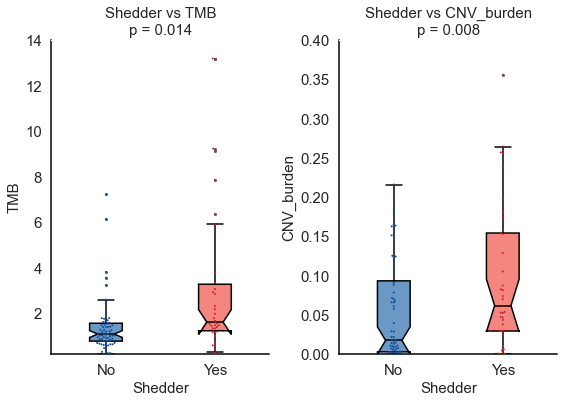

In [73]:
# Figure 3d,e
df = pd.read_excel(r".\data\POEM\Clinical.xlsx")
df = df[df["Subtype"] == "LUAD"]
df = df.rename(columns={"tmb": "TMB"})
analysis_d = {
    "Shedder": ["TMB", "CNV_burden"],
}
sns.set(style="whitegrid")
key_l, value_l, pvalue_l = [], [], []
for key, values in analysis_d.items():
    num_values = len(values)
    fig, axes = plt.subplots(1, num_values, figsize=(4 * num_values, 6), sharey=False)
    if num_values == 1:
        axes = [axes]
    for ax, value in zip(axes, values):
        box1_label = df[key].unique()[0]  
        box2_label = df[key].unique()[1]
        ylabel = value
        group1 = df[df[key] == box1_label][value].dropna()
        group2 = df[df[key] == box2_label][value].dropna()
        boxprops = dict(linewidth=1.5, edgecolor="black")
        whiskerprops = dict(linewidth=1.5, color="black")
        capprops = dict(linewidth=1.5, color="black")
        medianprops = dict(linewidth=1.5, color="black")
        flierprops = dict(marker="o", color="black", markersize=2, linestyle="none")
        sns.boxplot(
            x=df[key],
            y=df[value],
            ax=ax,
            palette=[lblue, lred],
            width=0.3,
            saturation=1,
            notch=True,
            linewidth=1.5,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            capprops=capprops,
            medianprops=medianprops,
            flierprops=flierprops,
        )
        sns.swarmplot(x=df[key], y=df[value], ax=ax, palette=[dblue, dred], size=2)
        if group1.nunique() > 10 and group2.nunique() > 10:
            stat, p_value = ttest_ind(group1, group2)
        else:
            stat, p_value = mannwhitneyu(group1, group2)
        ax.set_ylim([min(df[value].min(), group1.min(), group2.min()), 14])
        ax.set_xlabel(key, fontsize=15)
        ax.set_ylabel(ylabel, fontsize=15)
        ax.set_title(f"{key} vs {ylabel}\np = {p_value:.3f}", fontsize=15)
        if value == "CNV_burden":
            ax.set_ylim([min(df[value].min(), group1.min(), group2.min()), 0.4])
        ax.xaxis.set_tick_params(labelsize=15)
        ax.yaxis.set_tick_params(labelsize=15)
        ax.spines["bottom"].set_linewidth(1.5)
        ax.spines["left"].set_linewidth(1.5)
        ax.spines["bottom"].set_color("black")
        ax.spines["left"].set_color("black")
        ax.spines["right"].set_color("white")
        ax.spines["top"].set_color("white")
        ax.grid(False)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    # plt.savefig(rf'.\data\figure\{key}vs{ylabel}_LUAD.pdf',dpi=500,bbox_inches='tight')

[None]

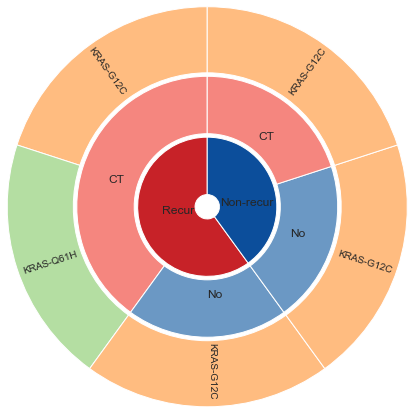

In [80]:
# Figure 3j
inner_labels = ["Recur", "Non-recur"]
inner_sizes = [3, 2]
inner_colors = [dred, dblue]
second_labels = ["CT", "No", "No", "CT"]
second_sizes = [2, 1, 1, 1]
second_colors = [lred, lblue, lblue, lred]
third_labels = ["KRAS-G12C", "KRAS-Q61H", "KRAS-G12C", "KRAS-G12C", "KRAS-G12C"]
third_sizes = [1, 1, 1, 1, 1]
third_colors = [lorange, lgreen, lorange, lorange, lorange]
fig, ax = plt.subplots()
ax.pie(
    third_sizes,
    labels=third_labels,
    startangle=90,
    colors=third_colors,
    radius=2.3,
    wedgeprops=dict(width=0.76, edgecolor="w"),
    rotatelabels=30,
    labeldistance=0.68,
    textprops=dict(fontsize=10),
)
ax.pie(
    second_sizes,
    labels=second_labels,
    startangle=90,
    colors=second_colors,
    radius=1.5,
    wedgeprops=dict(width=0.66, edgecolor="w"),
    rotatelabels=0,
    labeldistance=0.67,
    textprops=dict(fontsize=12),
)
ax.pie(
    inner_sizes,
    labels=inner_labels,
    startangle=90,
    colors=inner_colors,
    radius=0.8,
    wedgeprops=dict(width=0.66, edgecolor="w"),
    rotatelabels=0,
    labeldistance=0.19,
    textprops=dict(fontsize=12),
)
ax.set(aspect="equal")
# plt.savefig(r'.\figure\pre_Positive_egfr_minus.pdf',dpi=500,bbox_inches='tight')

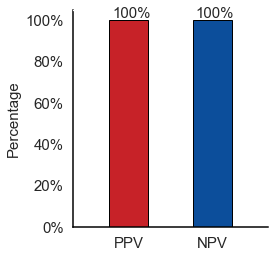

In [113]:
#Figure 4b
categories=['PPV', 'NPV']
barWidth = 0.35
plt.figure(figsize=(3.5, 4))
plt.bar(0.75,100, color=dred, width=barWidth, edgecolor='black')
plt.bar(1.5,100, color=dblue, width=barWidth, edgecolor='black')
plt.ylabel('Percentage', fontsize=15)
plt.xticks([0.75,1.5], categories, fontsize=15)
plt.yticks(np.arange(0, 110, 20), [f'{x}%' for x in range(0, 110, 20)], fontsize=15)
plt.xlim(0.25,2)
ax = plt.gca()
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('white')
ax.spines['top'].set_color('white')
plt.text(0.6,101,'100%',fontsize=15)
plt.text(1.35,101,'100%',fontsize=15)

plt.grid(False)

# plt.savefig(r'.\figure\shedder_with_gender.pdf',dpi=500,bbox_inches='tight')

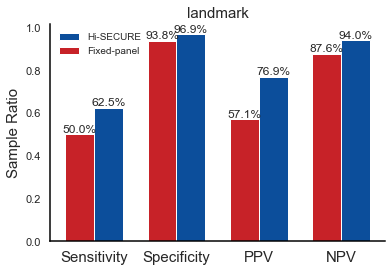

In [118]:
# Figure 5b
data = {
    "item": ["Sensitivity", "Specificity", "PPV", "NPV"],
    "Hi-SECURE": [0.625, 0.969, 0.769, 0.94],
    "Fixed-panel": [0.50, 0.938, 0.571, 0.876],
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")
fig, ax = plt.subplots()

bar_width = 0.35
index = range(len(df["item"]))
bar1 = ax.bar(
    [i + bar_width / 2 for i in index],
    df["Hi-SECURE"],
    bar_width,
    label="Hi-SECURE",
    color=dblue,
)
bar2 = ax.bar(
    [i - bar_width / 2 for i in index],
    df["Fixed-panel"],
    bar_width,
    label="Fixed-panel",
    color=dred,
)

ax.set_ylabel("Sample Ratio", fontsize=15)
ax.set_title("landmark", fontsize=15)
ax.set_xticks(index, fontsize=15)
ax.set_xticklabels(df["item"], fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")
ax.legend(frameon=False, fontsize=10)
plt.grid(False)

for rect in bar1:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
    )

for rect in bar2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
    )

# plt.savefig(r'.\figure\Performance_landmark.pdf',dpi=500,bbox_inches='tight')

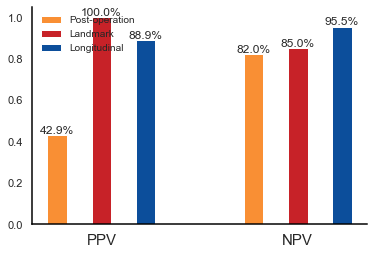

In [126]:
# Figure 5c
data = {
    "item": ["PPV", "NPV"],
    "Post-operation": [0.429, 0.82],
    "Landmark": [1, 0.85],
    "Longitudinal": [0.889, 0.955],
}

df = pd.DataFrame(data)
sns.set(style="whitegrid")
fig, ax = plt.subplots()

bar_width = 0.1
index = range(len(df["item"]))
bar1 = ax.bar(
    [i - 0.45 / 2 for i in index],
    df["Post-operation"],
    bar_width,
    label="Post-operation",
    color=dorange,
)
bar2 = ax.bar(
    [i for i in index],
    df["Landmark"],
    bar_width,
    label="Landmark",
    color=dred,
)
bar3 = ax.bar(
    [i + 0.45 / 2 for i in index],
    df["Longitudinal"],
    bar_width,
    label="Longitudinal",
    color=dblue,
)
ax.set_xticks(index, fontsize=15)
ax.set_xticklabels(df["item"], fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_linewidth(1.5)
ax.spines["left"].set_linewidth(1.5)
ax.spines["bottom"].set_color("black")

ax.spines["left"].set_color("black")
ax.legend(frameon=False, fontsize=10)
plt.grid(False)

for rect in bar1:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
    )

for rect in bar2:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
    )


for rect in bar3:
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2.0,
        height,
        f"{height*100:.1f}%",
        ha="center",
        va="bottom",
    )
# plt.savefig(r'.\figure\pre_landmark_longitudinal.pdf',dpi=500,bbox_inches='tight')